In [72]:
## IMPORTACIÓN GENERAL DE LIBRERIAS Y VISUALIZACIÓN DE DATOS (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as DT
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
plt.style.use('default') 
sns.set(style="whitegrid") 
plt.rcParams['figure.figsize'] = (15, 10)

In [2]:
#Leemos el CSV
nlp = pd.read_csv('data/train.csv')

In [3]:
nlp.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [5]:
nlp['legth_tweet'] = nlp['text'].str.len()
nlp['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [6]:
nlp.head(10)

,id,keyword,location,text,target,legth_tweet
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,110
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1,95
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1,59
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1,79
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1,52


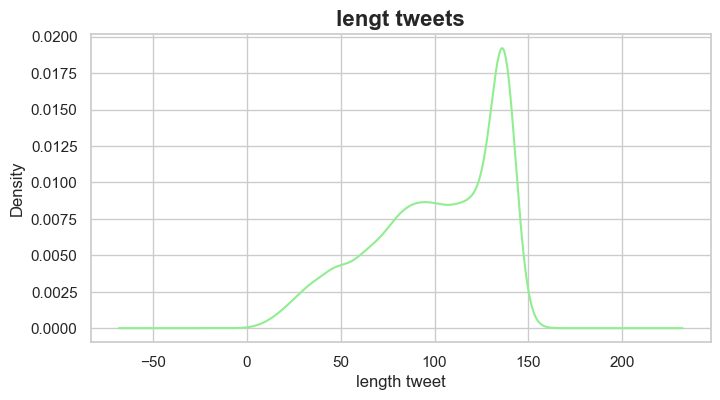

In [17]:
fig=plt.figure()
ax = fig.add_subplot(111)

plt.title('lengt tweets',fontsize=16,fontweight='bold')
ax.set_xlabel('length tweet')
nlp['legth_tweet'].plot.kde(color='lightgreen', figsize=(8, 4))
plt.show()

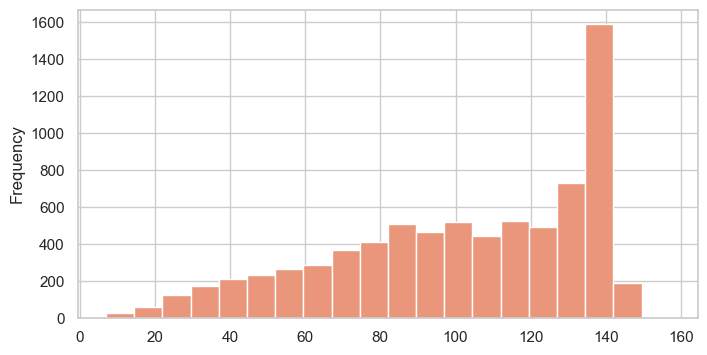

In [18]:
fig=plt.figure()
ax = fig.add_subplot(111)

#plt.title('Year of Award variable: Histogram',fontsize=16,fontweight='bold')
#ax.set_xlabel('year of award')
nlp['legth_tweet'].plot.hist(color='darksalmon', figsize=(8, 4), bins=20)

plt.show()

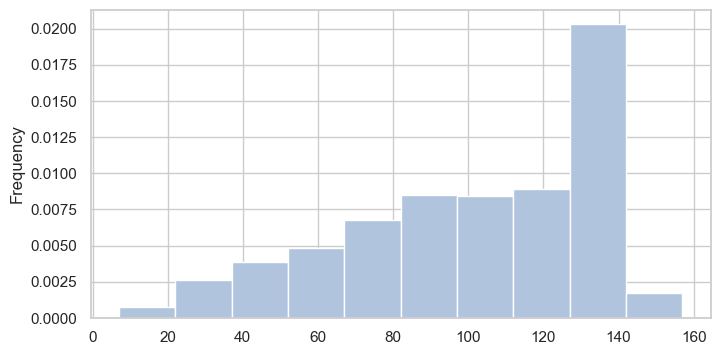

In [19]:
nlp['legth_tweet'].plot.hist(color='lightsteelblue', figsize=(8, 4), density=True)
nlp['legth_tweet'].plot.kde(color='darkblue', ax=ax, secondary_y=True)

plt.show()

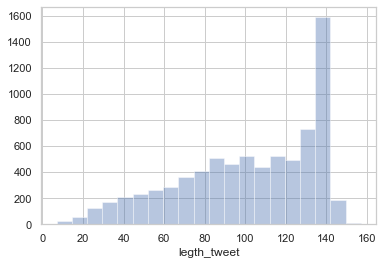

In [19]:
sns.distplot(nlp['legth_tweet'], kde=False, bins=20)

In [9]:
grouped = nlp.groupby(['legth_tweet','target'])[['id']].count().reset_index()
grouped.rename(columns={'id':'cant_veces'}, inplace=True)
grouped.shape

(281, 3)

In [30]:
grouped.tail(10)

,legth_tweet,target,cant_veces
271,147,1,3
272,148,0,4
273,148,1,3
274,149,0,2
275,149,1,1
276,150,1,2
277,151,1,1
278,152,0,1
279,155,0,1
280,157,0,1


In [20]:
grouped['target'].value_counts()

0    146
1    135
Name: target, dtype: int64

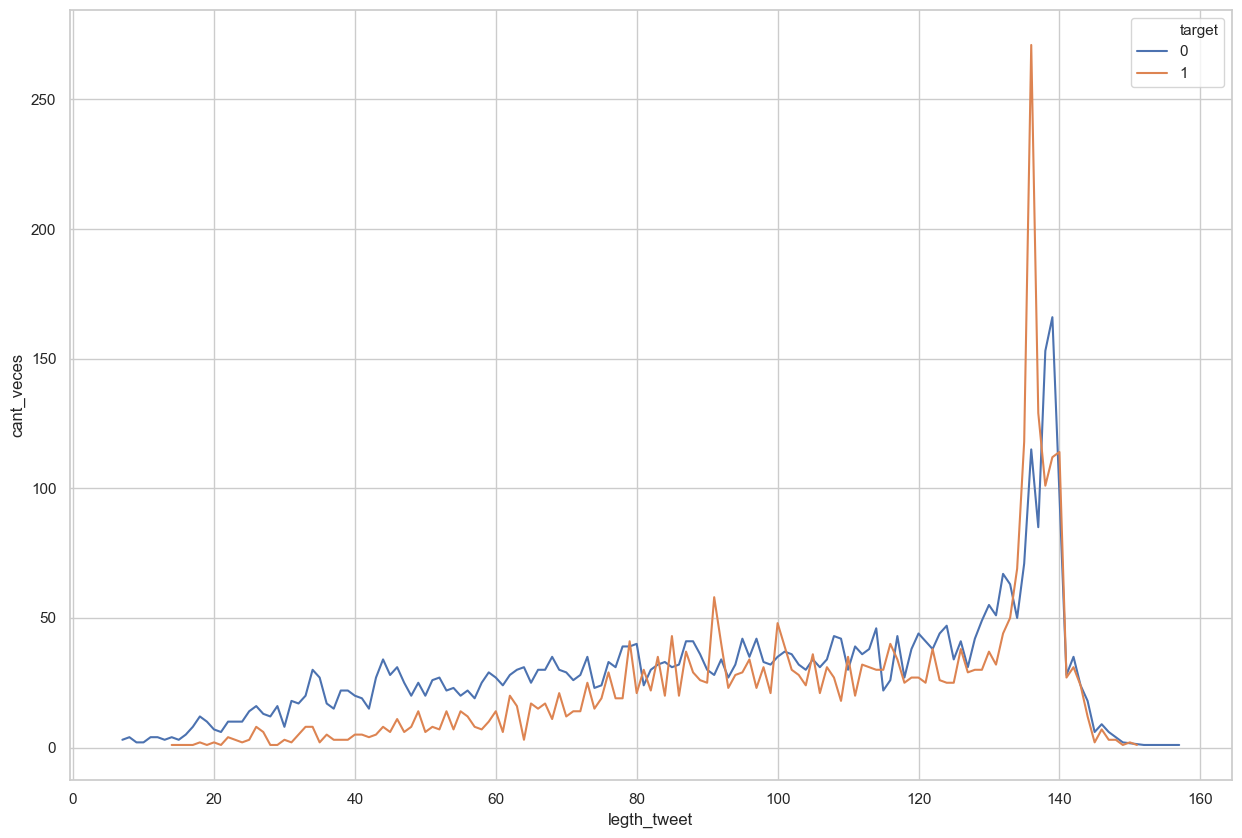

In [26]:
sns.lineplot(x="legth_tweet", y="cant_veces",hue="target",data=grouped)

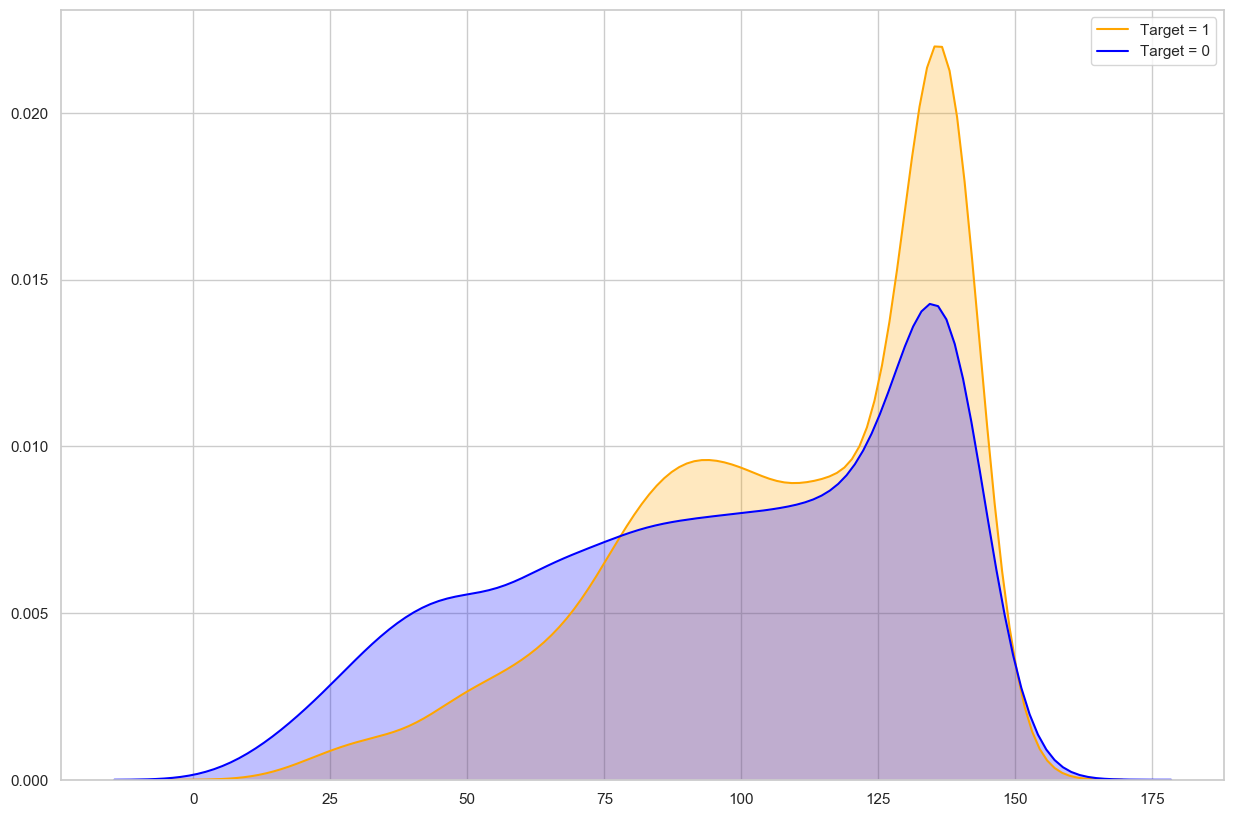

In [31]:
g = sns.kdeplot(nlp[nlp['target']==1]['legth_tweet'], color='orange', label='Target = 1', shade=True)
g = sns.kdeplot(nlp[nlp['target']==0]['legth_tweet'], color='blue', label='Target = 0', shade=True)

In [106]:
trueTweets = grouped.loc[grouped['target']==1, :]
trueTweets.describe()[['legth_tweet']]

,legth_tweet
count,135.000000
mean,83.933333
std,39.227465
min,14.000000
25%,50.500000
50%,84.000000
75%,117.500000
max,151.000000


In [199]:
falseTweets = grouped.loc[grouped['target']==0, :]
falsos = falseTweets.describe()[['legth_tweet']].rename(columns={'legth_tweet':'target0'}).unstack().to_frame().reset_index()
falsos.columns = ['col1','col2','col3']
verdaderos = trueTweets.describe()[['legth_tweet']].rename(columns={'legth_tweet':'target1'}).unstack().to_frame().reset_index()
verdaderos.columns = ['col1','col2','col3']
falsos = falsos.pivot(index='col1',columns='col2', values='col3')#.droplevel('col1')
verdaderos = falsos.pivot(index='col1',columns='col2', values='col3')#.droplevel('col1'

todos = pd.concat([falsos,verdaderos])

KeyError: 'col1'

Text(0, 0.5, 'Veces que se repite cada longitud')

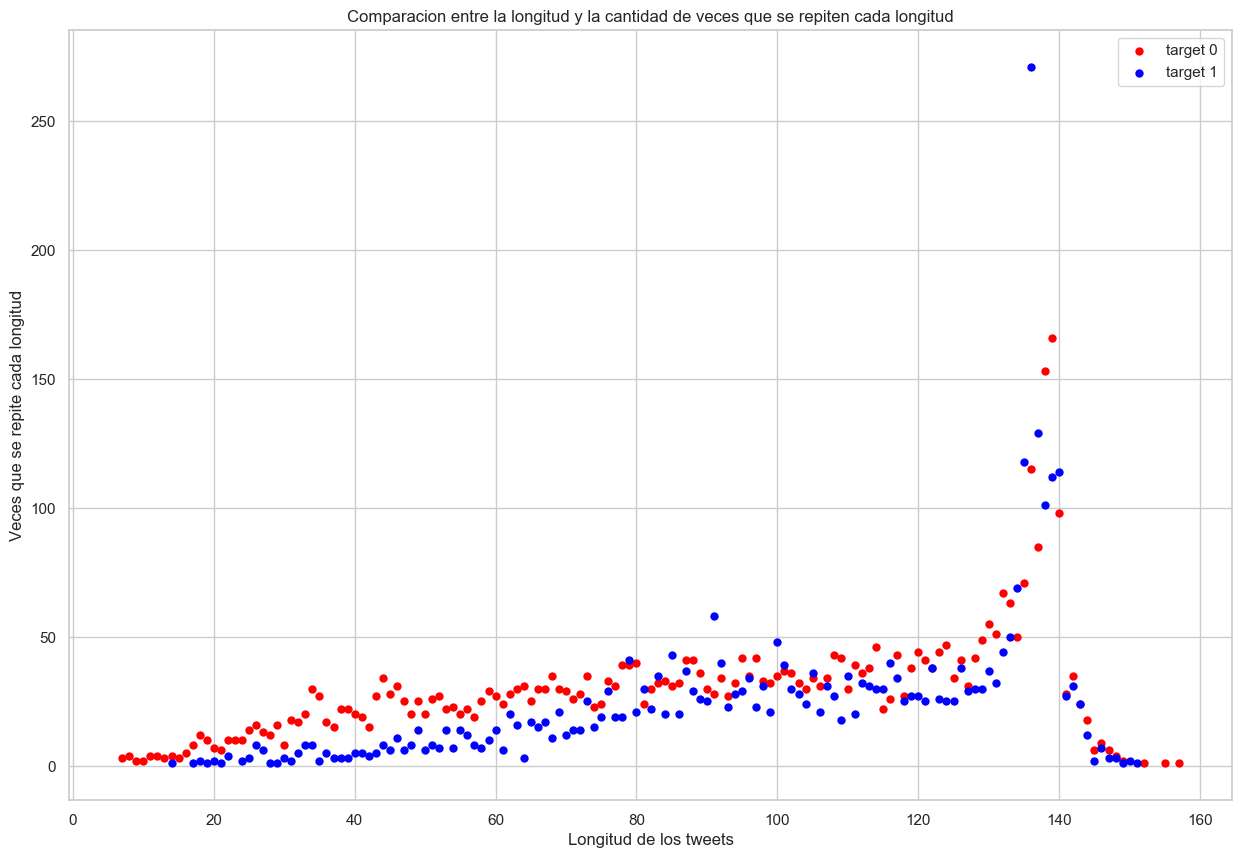

In [113]:
#cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
sns.scatterplot(x="legth_tweet", y="cant_veces", color="red", linewidth=0, data=falseTweets, label = "target 0")
sns.scatterplot(x="legth_tweet", y="cant_veces", color="blue", linewidth=0, data=trueTweets, label = "target 1")
plt.title("Comparacion entre la longitud y la cantidad de veces que se repiten cada longitud")
plt.xlabel("Longitud de los tweets")
plt.ylabel("Veces que se repite cada longitud")